MNIST dataset:
* Used an Convolution Neural Network (CNN) to identify handwritten digits( 1-10)
* use keras.predict_classes() for classification prediction
* Use model.summary() to get details of the layers
* Had to reshape X_train, X_test to include the 'channel' dimension (1) before passing to keras backend.
* Also, to use plt.imshow() reshape to get rid of the extra dimension (introduced earlier)
* Tuning the parameters of Keras: ( from missinglink.ai)
    * 'filters' : If there are 3 or fewer layers, use filters = one of [32, 64, 128]
    * conv2d closer to the input, use less filters than those closer to the output.
    * 'kernel_size': If images < 128x128, use (1,1) or (3,3) else (5,5), (7,7)
    * 'strides': default (1,1) ok; may increase to (2,2) to reduce size of output volume
    * 'padding': default of 'valid' ok; 
       but often effective to set to 'same' ( => input will be zero-padded so the conv output can
       be the same size as the input.);
       then reduce spatial dimensions using max pooling

In [1]:
import keras
from keras.models  import (Sequential)
from keras.layers import (Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout)
from sklearn.model_selection import train_test_split
from sklearn.datasets import (load_digits)
from keras.datasets import mnist
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

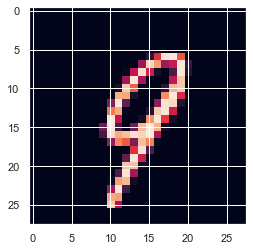

In [4]:
#Visualize
idx = 22
plt.imshow(X_train[idx])

In [5]:
y_train[idx]

9

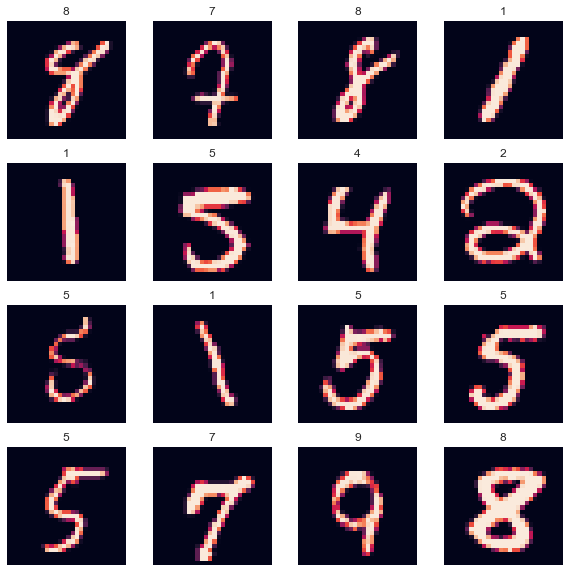

In [6]:
L = 4
W = 4
fig, axes = plt.subplots(L, W, figsize=(10, 10))
axes = axes.ravel()
num_samples = X_train.shape[0]
for i in np.arange(L*W):
    idx = np.random.randint(0, num_samples)
    axes[i].imshow(X_train[idx])
    axes[i].set_title(y_train[idx])
    axes[i].axis('off')

In [7]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')

In [16]:
X_test = X_test.reshape(X_test.shape[0], 28,28,1).astype('float32')
X_test.shape

(10000, 28, 28, 1)

In [8]:
np.max(X_train), np.min(X_train)

(255.0, 0.0)

In [17]:
# Normalize the pixel values from 0-255 to 0-1 ( good for NN models)
X_norm = X_train/255
X_test_norm = X_test/255
#X_norm

In [10]:
#For a multi-class classification problem, 
#good to transform the vector of integer values (in y) to a binary matrix 
#using OHE
num_cats = 10
y_ohe = keras.utils.to_categorical(y_train, num_cats)
y_test_ohe = keras.utils.to_categorical(y_test, num_cats)
y_ohe.shape, y_test_ohe.shape

((60000, 10), (10000, 10))

In [11]:
X_norm.shape, X_test_norm.shape, y_ohe.shape, y_test_ohe.shape

((60000, 28, 28, 1), (10000, 28, 28), (60000, 10), (10000, 10))

In [12]:
# Note: passing input_dim as 28,28,1
# Create the model
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3) , input_shape=(28,28,1), activation='relu'))
cnn_model.add(Conv2D(filters = 32, kernel_size=(3,3)))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.4))

'''
cnn_model.add(Conv2D(filters = 32, kernel_size=(3,3)))

cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.4))
'''

cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(num_cats, activation='softmax'))
cnn_model.summary()

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)      

In [13]:
keras.backend.image_data_format()

'channels_last'

In [14]:
hist = cnn_model.fit(X_norm, y_ohe, epochs=5, batch_size=5, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 122s 3ms/step - loss: 0.1452 - acc: 0.9541 - val_loss: 0.0590 - val_acc: 0.9819
Epoch 2/5
48000/48000 [==============================] - 121s 3ms/step - loss: 0.0631 - acc: 0.9804 - val_loss: 0.0552 - val_acc: 0.9842
Epoch 3/5
48000/48000 [==============================] - 123s 3ms/step - loss: 0.0484 - acc: 0.9853 - val_loss: 0.0485 - val_acc: 0.9862
Epoch 4/5
48000/48000 [==============================] - 127s 3ms/step - loss: 0.0408 - acc: 0.9875 - val_loss: 0.0582 - val_acc: 0.9849
Epoch 5/5
48000/48000 [==============================] - 141s 3ms/step - loss: 0.0352 - acc: 0.9893 - val_loss: 0.0569 - val_acc: 0.9870


In [18]:
#Evaluate teh model
test_loss, test_acc = cnn_model.evaluate(X_test_norm, y_test_ohe)
print('Test Loss: {:.2f} Test Acc: {:.2f}'.format(test_loss, test_acc))

10000/10000 [==============================] - 3s 331us/step
Test Loss: 0.05 Test Acc: 0.99


In [19]:
predicted_classes = cnn_model.predict_classes(X_test_norm) 
predicted_classes

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [21]:
y_test_ohe_inv = y_test_ohe.argmax(1)

In [23]:
np.all(y_test == y_test_ohe_inv)

True

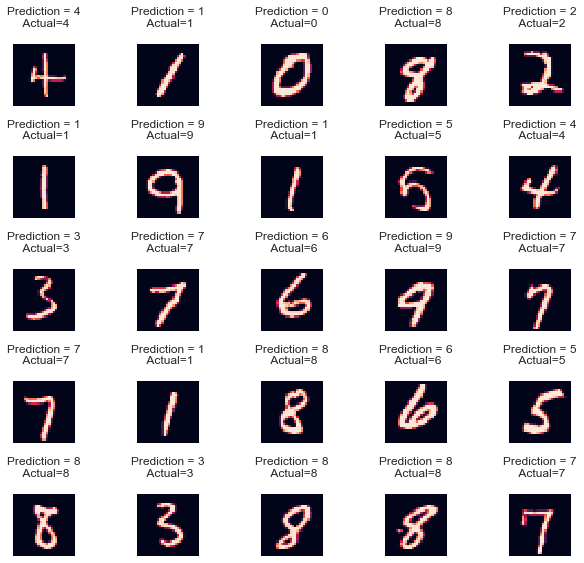

In [25]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (10,10))
axes = axes.ravel()
num_samples = X_test.shape[0]
# reshaping since imshow() can't deal with channels
X_test_mod = X_test.reshape(X_test.shape[0], 28, 28)
for i in np.arange(0, L*W):
    idx = np.random.randint(0, num_samples)
    axes[i].imshow(X_test_mod[idx])
    axes[i].set_title('Prediction = {}\n Actual={}\n'.format(predicted_classes[idx], y_test[idx]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=1)

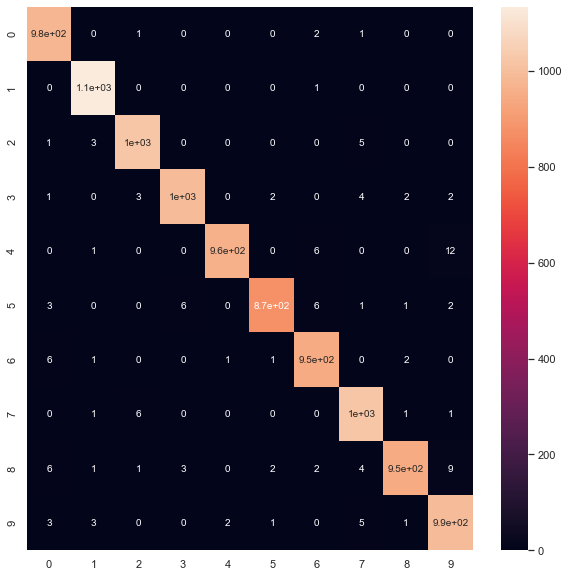

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

In [27]:
#Saving the model

import os 
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_mnist_trained_model.h5')
cnn_model.save(model_path)